Krishan Kumar Pandey

In [1]:
# Import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

In [2]:
#read data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Statistical Overview
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


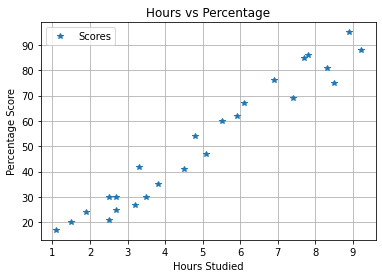

In [5]:
#visualization
data.plot(x='Hours', y='Scores', style='*',grid=True)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

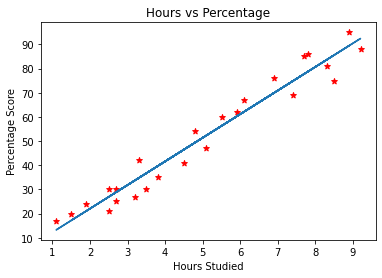

In [6]:
#plot regression line
m, b = np.polyfit(data['Hours'],data['Scores'], 1) 
plt.scatter(data['Hours'],data['Scores'],c='red', marker='*') 
plt.plot(data['Hours'], m*data['Hours']+ b)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
#Splitting into Input and Output
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

In [9]:
print('Train input contains',X_train.shape, end=" Rows and columns")
print()
print('Test input contains', X_test.shape, end=" Rows and columns")
print()
print('Train Output Contains',y_train.shape, end=" Rows and columns") 
print()
print('Test Output Contains',y_test.shape, end=" Rows and columns")

Train input contains (17, 1) Rows and columns
Test input contains (8, 1) Rows and columns
Train Output Contains (17,) Rows and columns
Test Output Contains (8,) Rows and columns

### Model Selection

In [10]:
reg_model = LinearRegression()  
reg_model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [15]:
prediction = reg_model.predict(X_test)

In [16]:
predict= pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
print(predict)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


In [17]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, prediction)) 
print()
print('Accuracy is', reg_model.score(X_test, y_test)*100,'%')

Mean Absolute Error: 4.419727808027652

Accuracy is 95.68211104435257 %


### User Input

In [19]:
User_Input=[float(input('Enter the hour to Predict Percentage:'))]
df=pd.DataFrame(User_Input)
predict=reg_model.predict(df)
print('The Predicted pecentage is: ',predict)

Enter the hour to Predict Percentage:9.5
The Predicted pecentage is:  [95.36219891]
